In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('Epileptic Seizure Recognition.csv')
df = df.drop(columns=df.columns[0])

y = df.y
y[y > 1] = 0
X = df.drop(['y'], axis=1)
Y = df['y'].values


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=10, gamma='auto', kernel='rbf'))
])


svc_pipeline.fit(X_train, y_train)


def predict(x):
    return svc_pipeline.predict(x)


svc_pred = predict(X_test)
acc_svc = accuracy_score(y_test, svc_pred) * 100
print("Accuracy is:", str(acc_svc) + '%')

Accuracy is: 98.26086956521739%


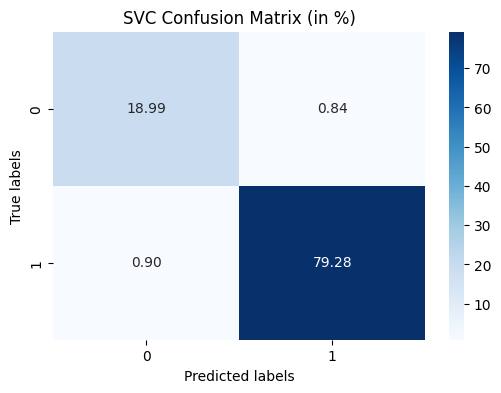

In [3]:
cm = confusion_matrix(y_test, svc_pred)

total_samples = np.sum(cm)
tp_percentage = (cm[1, 1] / total_samples) * 100
tn_percentage = (cm[0, 0] / total_samples) * 100
fp_percentage = (cm[0, 1] / total_samples) * 100
fn_percentage = (cm[1, 0] / total_samples) * 100

percentages = np.array([[tp_percentage, fn_percentage],
                        [fp_percentage, tn_percentage]])

plt.figure(figsize=(6, 4))
sns.heatmap(percentages, annot=True, fmt=".2f", cmap="Blues")

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVC Confusion Matrix (in %)')
plt.show()

PermutationExplainer explainer: 1001it [2:00:34,  7.25s/it]                           


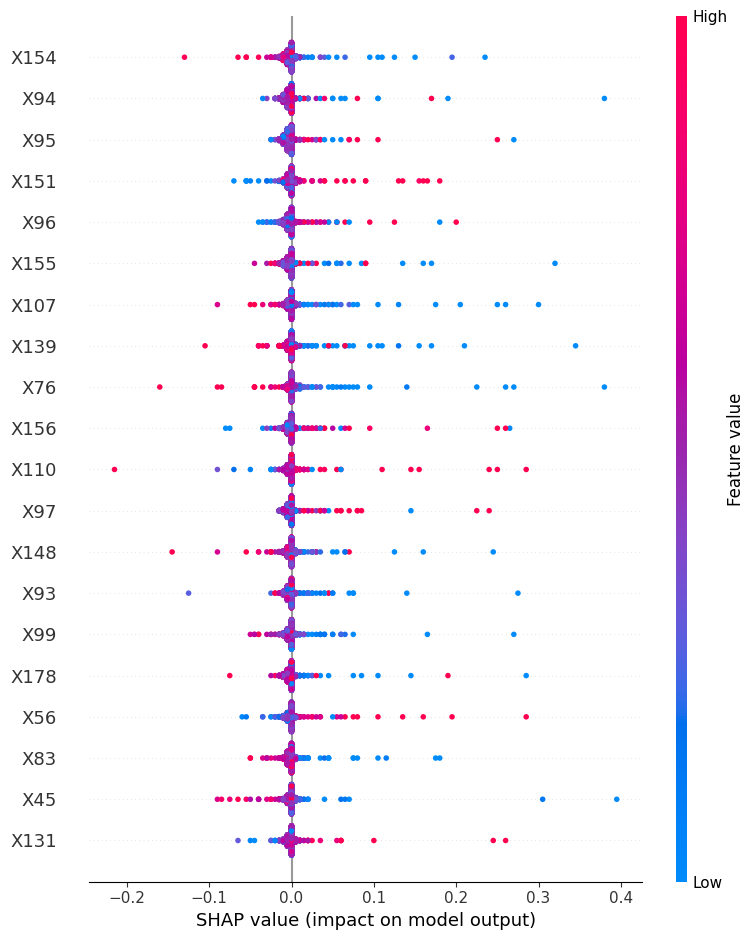

In [6]:
import shap
shap.initjs()

explainer = shap.Explainer(predict, X_train)

# the SHAP values for the first 100 instances in the test set
# ---> shap_values = explainer.shap_values(X_test)
shap_values = explainer(X_test[:1000])


shap.summary_plot(shap_values, X_test[:1000])


In [9]:
## save all the models
import pickle

with open('explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

# Storing the SHAP values for later use
with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values, f)
    
# Storing the trained SVC pipeline model
with open('svc_model.pkl', 'wb') as f:
    pickle.dump(svc_pipeline, f)

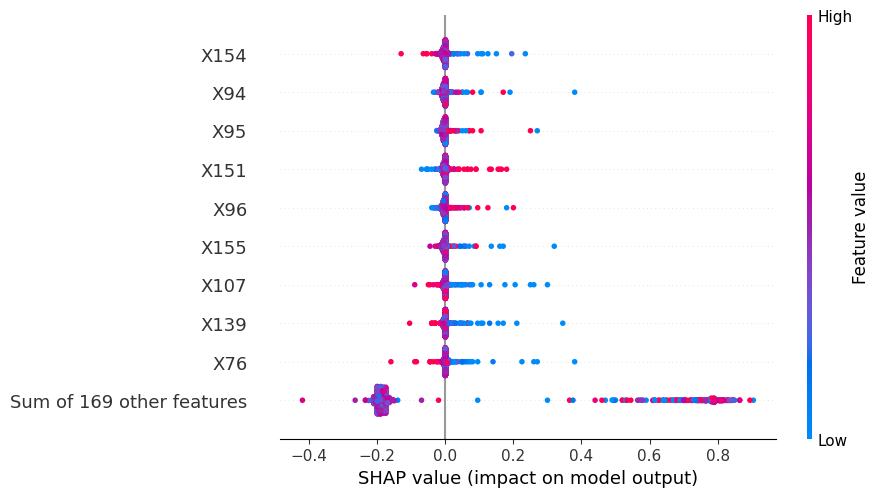

In [10]:
shap.plots.beeswarm(shap_values)

In [11]:
X_test[:100].shape

(100, 178)

In [12]:
shap_values.shape

(1000, 178)

In [ ]:
# This runs Faster
shape_values_bin = explainer(X_test[:100])

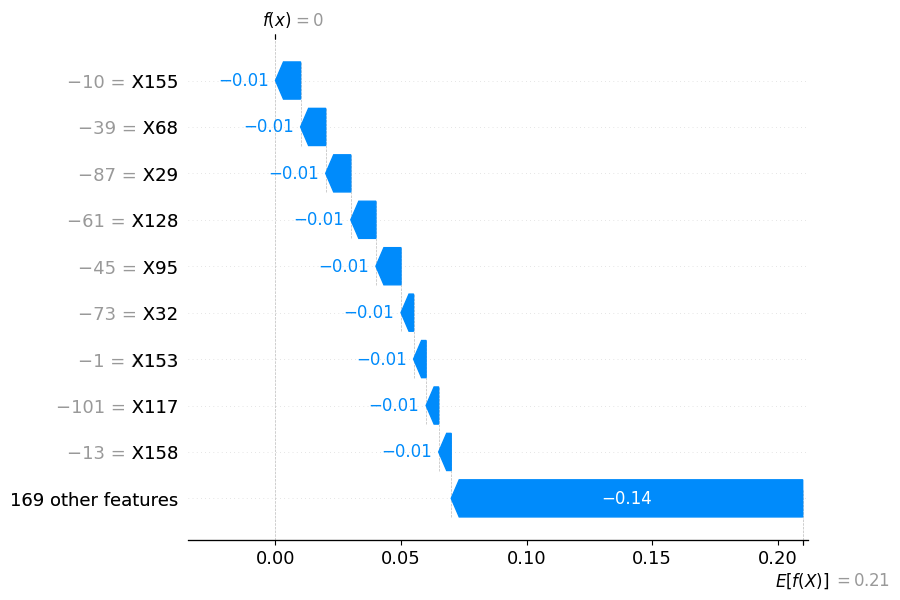

In [19]:
shap.plots.waterfall(shap_values[2])

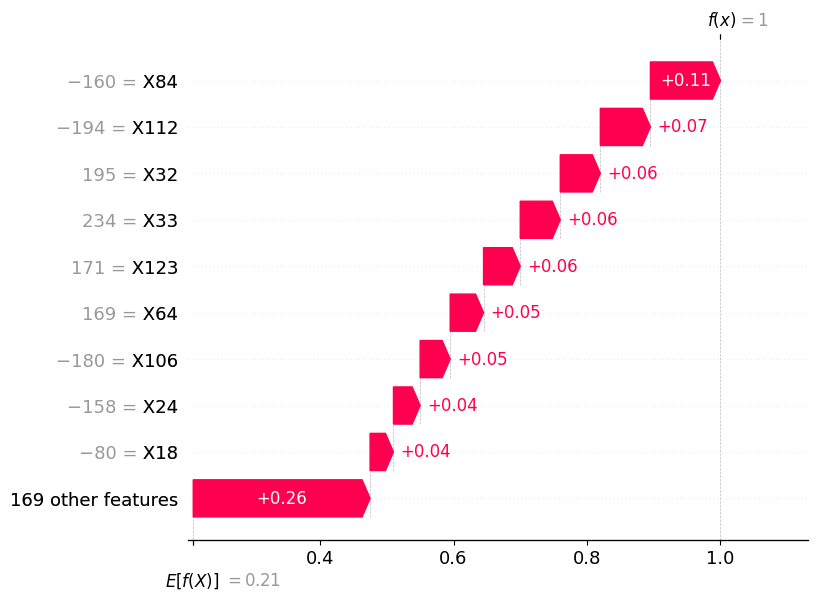

In [17]:
shap.plots.waterfall(shap_values[1])

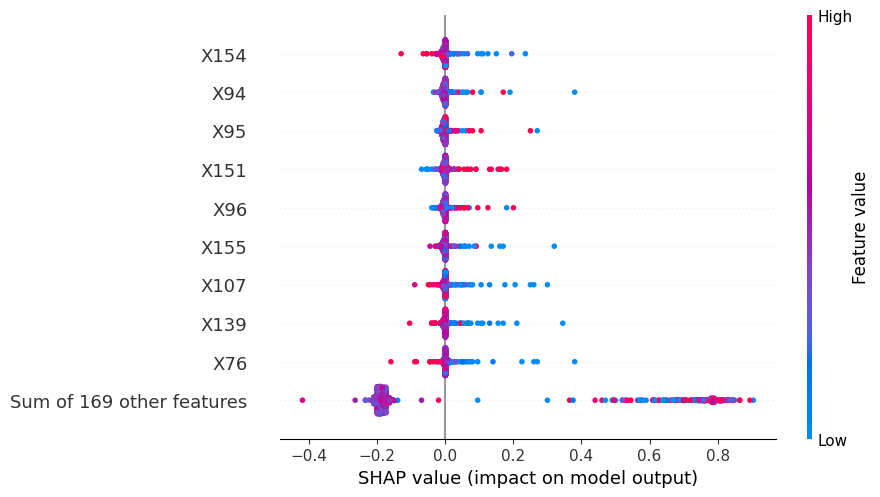

In [20]:
shap.plots.beeswarm(shap_values)

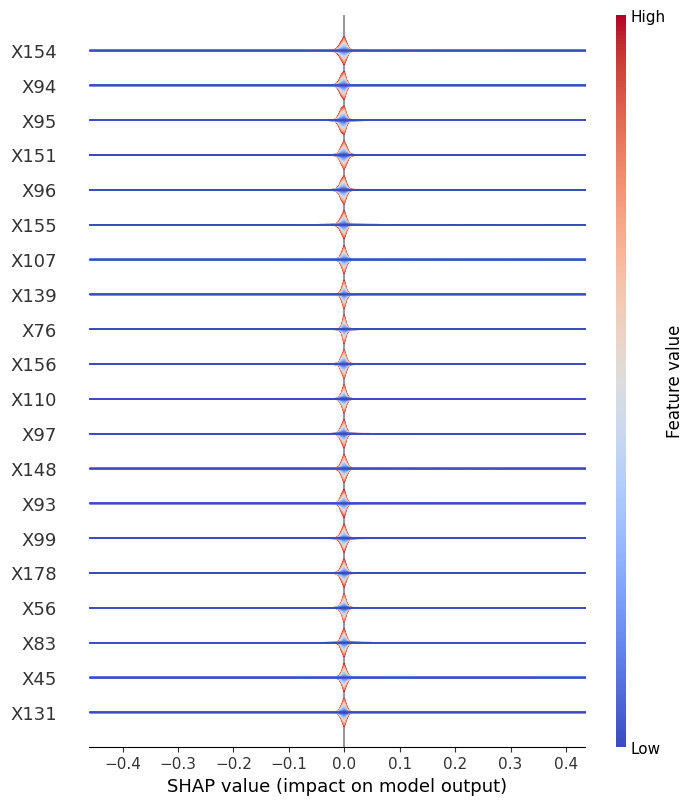

In [22]:
shap.plots.violin(shap_values, plot_type="layered_violin")

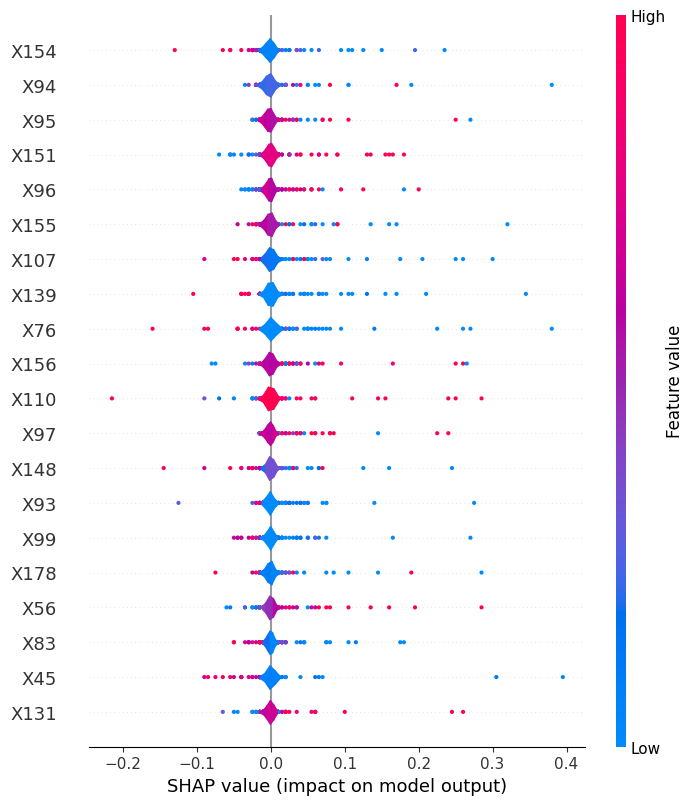

In [23]:
shap.plots.violin(shap_values)

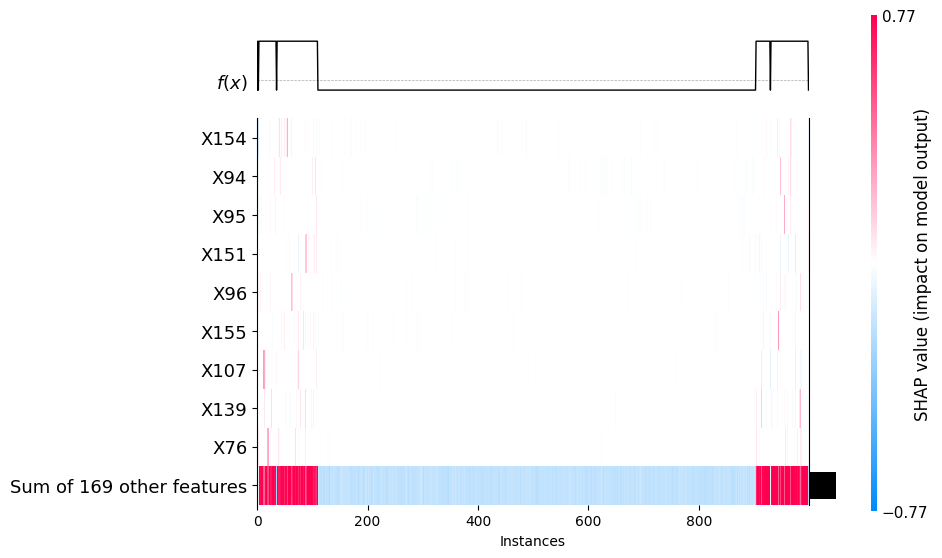

In [24]:
shap.plots.heatmap(shap_values)

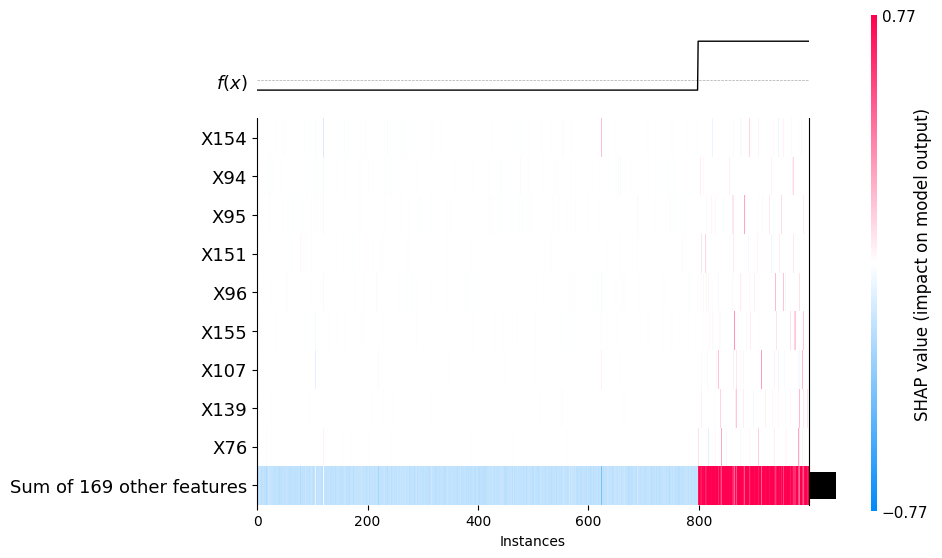

In [25]:
# order by predictions
order = np.argsort(svc_pred[:1000])
shap.plots.heatmap(shap_values, instance_order=order)

### More plots to discover - 
https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/decision_plot.html

In [29]:
# model = SVC(C=10, gamma='auto', kernel='rbf')

# tree_explainer = shap.TreeExplainer()
# expected_value = tree_explainer.expected_value